### Homework 1 - Question 3 - Luke Arend

### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotVec2(M):
    assert M.shape[0] == 2 # matrix must have two rows
    for v in M.T:
        plt.arrow(0, 0, *v, head_width=0.05, length_includes_head=True)
    plt.axis('square')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])

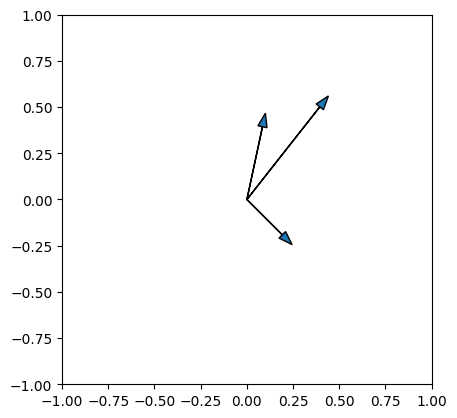

In [3]:
np.random.seed(0)
M = 0.25 * np.random.randn(2, 3)
plotVec2(M)
plt.show()

### b)

`vecLenAngle` takes two vectors as arguments and returns the magnitude of each vector, as well
as the angle (in radians) between them. It returns 0 for the angle if either vector has zero length.

In [4]:
def vecLenAngle(v1, v2):
    L1 = np.sqrt(np.sum(v1 ** 2))
    L2 = np.sqrt(np.sum(v2 ** 2))
    if L1 * L2 == 0:
        angle = 0
    else:
        angle = np.arccos(np.sum(v1 * v2) / (L1 * L2))
    return L1, L2, angle

In [5]:
v1, v2 = np.random.randn(2, 2)
print(f"v1: {v1}\nv2: {v2}")
print(f"vecLenAngle(v1, v2): {vecLenAngle(v1, v2)}")

v1: [ 0.95008842 -0.15135721]
v2: [-0.10321885  0.4105985 ]
vecLenAngle(v1, v2): (0.9620691272564312, 0.42337366611495336, 1.9750603468048809)


### c)

Generate a random matrix M.

In [6]:
M = np.random.randn(2, 2)
M

array([[0.14404357, 1.45427351],
       [0.76103773, 0.12167502]])

Decompose it using the singular value decomposition.

In [7]:
U, S, Vt = np.linalg.svd(M)
np.allclose(np.dot(U * S, Vt), M)

True

Generate standard basis vectors. Compute their lengths and the angle between them.

In [8]:
I = np.identity(2)

In [9]:
vecLenAngle(I[:, 0], I[:, 1])

(1.0, 1.0, 1.5707963267948966)

Their lengths are 1 and the angle between them is $\pi/2$ radians or 90 degrees.

Rotate the standard basis by $V^T$, and compute the lengths/angle between those.

In [10]:
X1 = np.dot(Vt, I)
vecLenAngle(X1[:, 0], X1[:, 1])

(1.0000000000000002, 1.0000000000000002, 1.5707963267948966)

After applying $V^T$, their lengths are still 1 and the angle between them is still $\pi/2$ radians.

Now scale the vectors by factors of $S_{diag}$ along the directions of the standard basis and compute the lengths/angle.

In [11]:
X2 = np.dot(np.diag(S), X1)
vecLenAngle(X2[:, 0], X2[:, 1])

(0.7745495268152256, 1.4593547350431704, 1.3002637488305455)

Following S, the vector lengths have changed. Also the angle between them is no longer $\pi/2$ radians. Call their new lengths $L_1$ and $L_2$ and the new angle $\theta$.

Finally rotate the vectors by U, and compute the lengths/angle again.

In [12]:
X3 = np.dot(Vt, X2)
vecLenAngle(X3[:, 0], X3[:, 1])

(0.7745495268152257, 1.4593547350431706, 1.3002637488305453)

Following U, the lengths $L_1$ and $L_2$ and the angle $\theta$ are preserved.

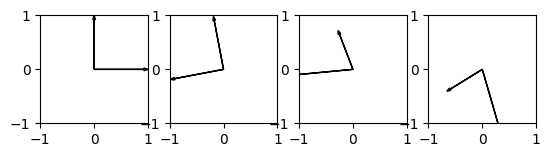

In [13]:
fig, axes = plt.subplots(1, 4)
for i, X in enumerate([I, X1, X2, X3]):
    plt.sca(axes[i])
    plotVec2(X)
plt.show()

### d)

Generate a 2x65 data matrix P of unit vectors tracing out the unit circle in 64 steps.

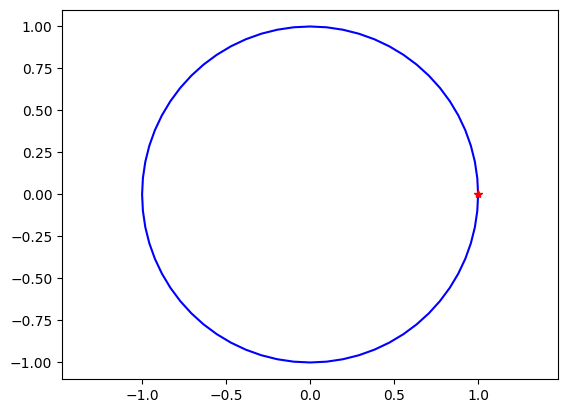

In [14]:
theta = 2 * np.pi * np.arange(65) / 64
P = np.array([np.cos(theta), np.sin(theta)])
plt.plot(*P, 'b')
plt.plot(*P[:, 0], 'r*')
plt.axis('equal')
plt.show()

The action of the matrix M in the previous problem was decomposed into three separate actions: rotating by $V_T$, scaling by the singular values $S_{diag}$ and rotating by $U$. Rotation by $V_T$ just rotates the unit circle. The scaling operation by S stretches or compresses the circle along the axes of the standard basis, giving an axis-aligned ellipse. The rotation by U rotates the ellipse in the plane. This is shown below.

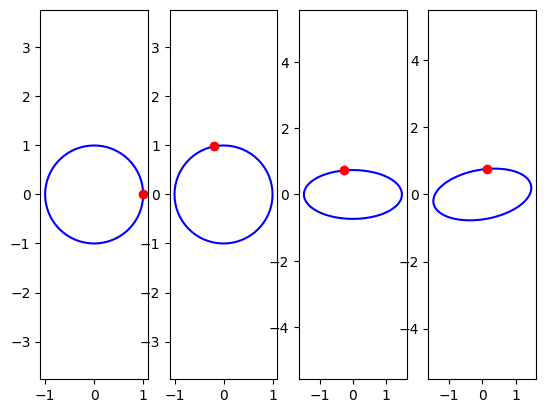

In [15]:
X1 = np.dot(Vt, P)
X2 = np.dot(np.diag(S), X1)
X3 = np.dot(U, X2)

fig, axes = plt.subplots(1, 4)
for i, X in enumerate([P, X1, X2, X3]):
    plt.sca(axes[i])
    plt.plot(*X, 'b')
    plt.plot(*X[:, 0], 'ro')
    plt.axis('equal')
plt.show()